# Example 1: Random vibration theory SRA

Random vibration theory analysis to compute surface response spectrum and site 
amplification functions.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import pysra

%matplotlib inline

In [2]:
# Increased figure sizes
plt.rcParams['figure.dpi'] = 120

## Create a point source theory RVT motion

In [3]:
m = pysra.motion.SourceTheoryRvtMotion(6.0, 30, 'wna')
m.calc_fourier_amps()

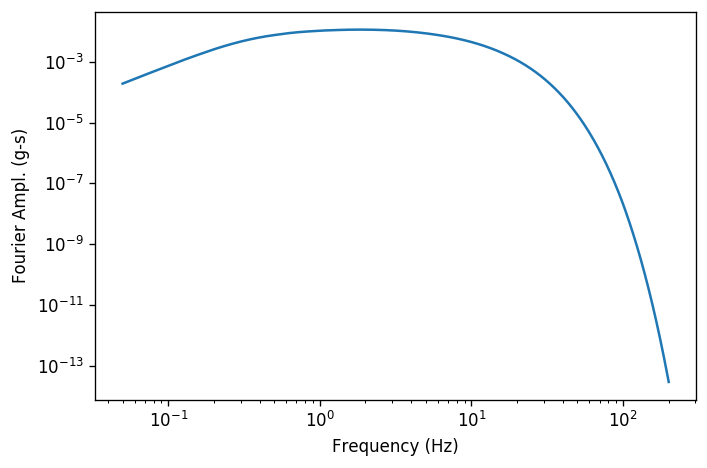

In [4]:
fig, ax = plt.subplots()
ax.plot(m.freqs, m.fourier_amps)
ax.set(xlabel='Frequency (Hz)', xscale='log', ylabel='Fourier Ampl. (g-s)', yscale='log')
fig.tight_layout();

## Create site profile

This is about the simplest profile that we can create. Linear-elastic soil and rock.

In [5]:
profile = pysra.site.Profile([
    pysra.site.Layer(
        pysra.site.SoilType(
            'Soil', 18., None, 0.05
        ),
        30, 400
    ),
    pysra.site.Layer(
        pysra.site.SoilType(
            'Rock', 24., None, 0.01
        ),
        0, 1200
    ),
])

## Create the site response calculator

In [6]:
calc = pysra.propagation.LinearElasticCalculator()

## Specify the output

In [7]:
freqs = np.logspace(-1, 2, num=500)

outputs = pysra.output.OutputCollection([
    pysra.output.ResponseSpectrumOutput(
        # Frequency
        freqs,
        # Location of the output
        pysra.output.OutputLocation('outcrop', index=0),
        # Damping
        0.05),
    pysra.output.ResponseSpectrumRatioOutput(
        # Frequency
        freqs,
        # Location in (denominator),
        pysra.output.OutputLocation('outcrop', index=-1),
        # Location out (numerator)
        pysra.output.OutputLocation('outcrop', index=0),
        # Damping
        0.05)
])

## Perform the calculation

Compute the response of the site, and store the state within the calculation object. Nothing is provided.

In [8]:
calc(m, profile, profile.location('outcrop', index=-1))

Calculate all of the outputs from the calculation object.

In [9]:
outputs(calc)

## Plot the outputs

Create a few plots of the output.

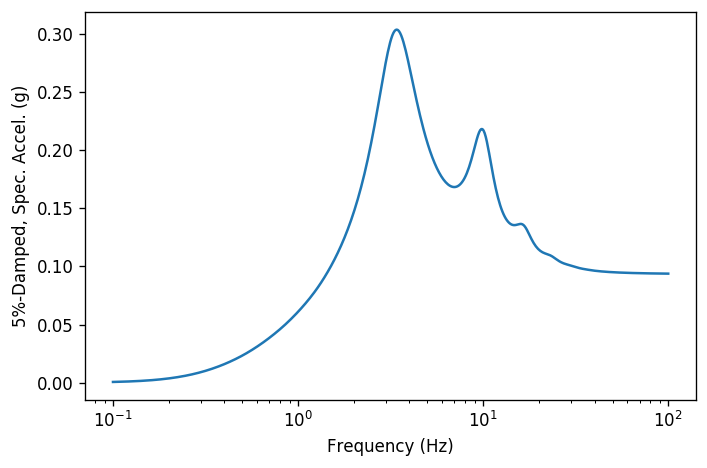

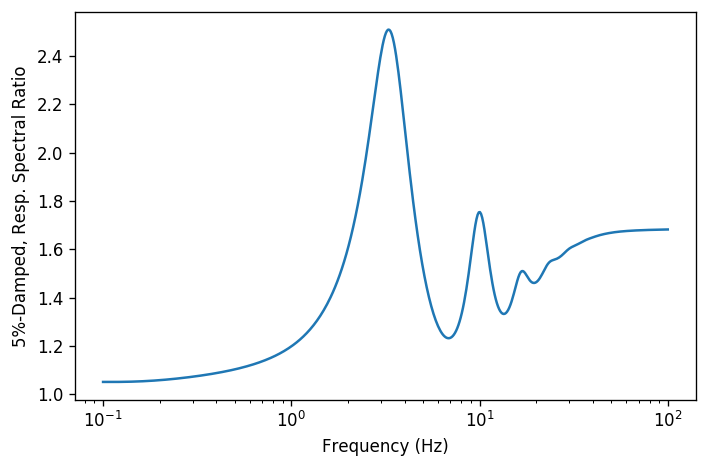

In [10]:
for o in outputs:
    fig, ax = plt.subplots()
    ax.plot(o.refs, o.values)
    ax.set(xlabel=o.xlabel, xscale='log', ylabel=o.ylabel)
    fig.tight_layout();